In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

Class distribution:
Class 0: 900 samples (90.00%)
Class 1: 100 samples (10.00%)

First few rows of the dataset:
   Feature 1  Feature 2  Target
0  -1.402878  -0.173382       0
1  -2.245828  -1.120642       0
2  -1.914231  -0.572390       0
3  -0.566826   1.595493       0
4  -1.339679   0.863684       0


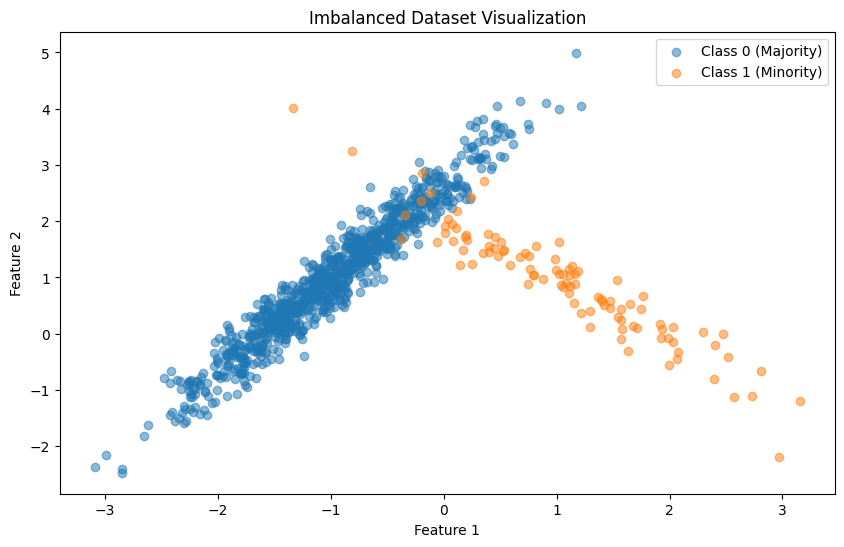

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def generate_imbalanced_data(n_samples=1000, weights=(0.9, 0.1), n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42):
    """
    Generate imbalanced dataset for binary classification.
    
    Parameters:
    - n_samples: Total number of samples
    - weights: Tuple of class weights (should sum to 1)
    - n_features: Number of features
    - n_classes: Number of classes (should be 2 for binary classification)
    - n_clusters_per_class: Number of clusters per class
    - random_state: Random state for reproducibility
    
    Returns:
    - X: Feature matrix
    - y: Target vector
    """
    X, y = make_classification(n_samples=n_samples, 
                               n_features=n_features, 
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters_per_class, 
                               weights=weights,
                               n_informative=n_features,  # Set this to n_features
                               n_redundant=0,  # Set this to 0
                               n_repeated=0,  # Set this to 0
                               flip_y=0, 
                               random_state=random_state)
    
    return X, y

def visualize_data(X, y):
    """
    Visualize the generated imbalanced dataset.
    
    Parameters:
    - X: Feature matrix
    - y: Target vector
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0 (Majority)', alpha=0.5)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1 (Minority)', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Imbalanced Dataset Visualization')
    plt.legend()
    plt.show()

# Generate imbalanced data
X, y = generate_imbalanced_data(n_samples=1000, weights=(0.9, 0.1))

# Display class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:")
for class_label, count in zip(unique, counts):
    print(f"Class {class_label}: {count} samples ({count/len(y)*100:.2f}%)")

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Visualize the data
visualize_data(X, y)

In [4]:
class DataGenerator(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __getitem__(self, idx):
        return sefl.X.iloc[idx], self.y.iloc[idx]
    def __len__(self):
        return len(self.X)

In [5]:
dataset = DataGenerator(X, y)